In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.interpolate as sinterpolate
import scipy.io as sio

# Load trajectories

In [2]:
N = 20
predict_trajs = []
predict_full_trajs = []
legible_trajs = []
legible_full_trajs = []
for i in range(1, N + 1):
    print ('raw_trajectories/raw_predict_traj%d.mat' % i)
    predict_trajs.append(sio.loadmat('raw_trajectories/raw_predict_traj%d.mat' % i)['traj'])
    predict_full_trajs.append(sio.loadmat('raw_trajectories/raw_predict_traj%d.mat' % i))
    print ('raw_trajectories/raw_legible_traj%d.mat' % i)
    legible_trajs.append(sio.loadmat('raw_trajectories/raw_legible_traj%d.mat' % i)['traj'])
    legible_full_trajs.append(sio.loadmat('raw_trajectories/raw_legible_traj%d.mat' % i))

raw_trajectories/raw_predict_traj1.mat
raw_trajectories/raw_legible_traj1.mat
raw_trajectories/raw_predict_traj2.mat
raw_trajectories/raw_legible_traj2.mat
raw_trajectories/raw_predict_traj3.mat
raw_trajectories/raw_legible_traj3.mat
raw_trajectories/raw_predict_traj4.mat
raw_trajectories/raw_legible_traj4.mat
raw_trajectories/raw_predict_traj5.mat
raw_trajectories/raw_legible_traj5.mat
raw_trajectories/raw_predict_traj6.mat
raw_trajectories/raw_legible_traj6.mat
raw_trajectories/raw_predict_traj7.mat
raw_trajectories/raw_legible_traj7.mat
raw_trajectories/raw_predict_traj8.mat
raw_trajectories/raw_legible_traj8.mat
raw_trajectories/raw_predict_traj9.mat
raw_trajectories/raw_legible_traj9.mat
raw_trajectories/raw_predict_traj10.mat
raw_trajectories/raw_legible_traj10.mat
raw_trajectories/raw_predict_traj11.mat
raw_trajectories/raw_legible_traj11.mat
raw_trajectories/raw_predict_traj12.mat
raw_trajectories/raw_legible_traj12.mat
raw_trajectories/raw_predict_traj13.mat
raw_trajectories/r

# Analyzing data

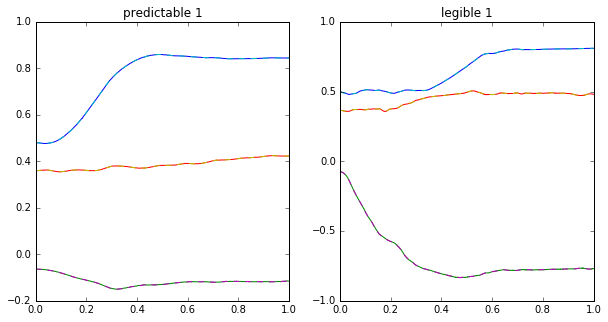

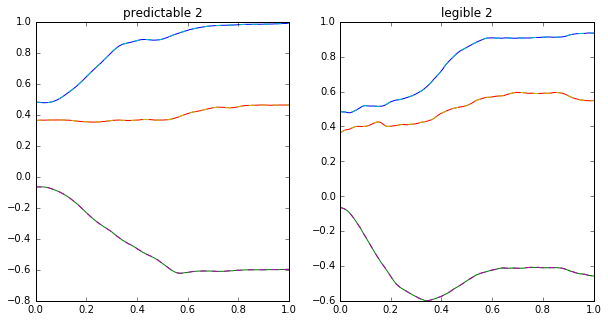

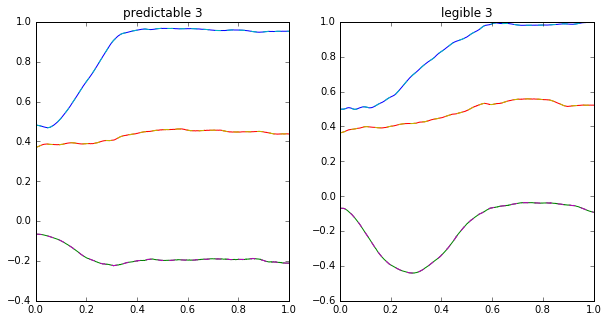

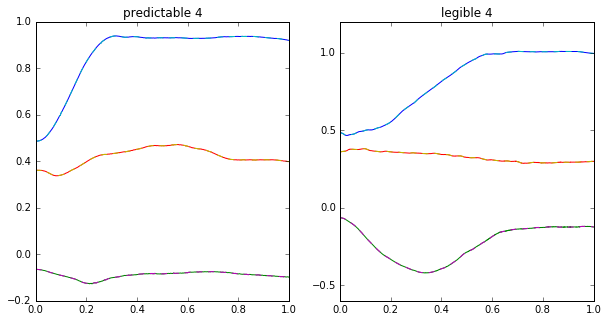

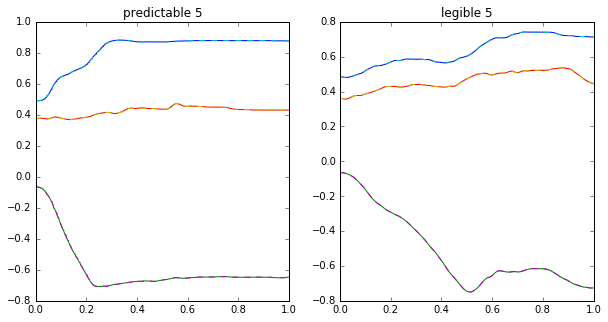

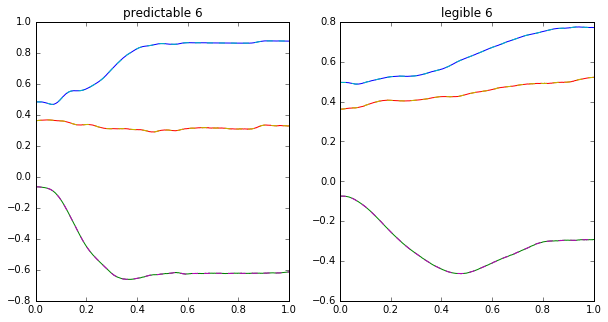

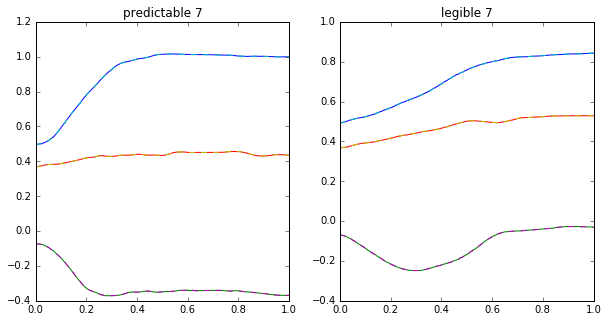

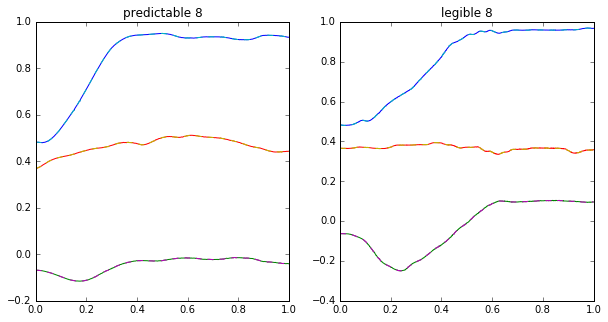

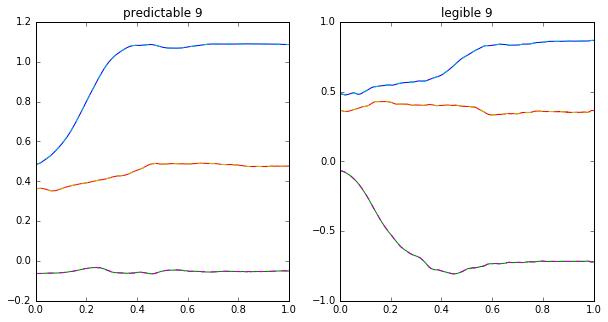

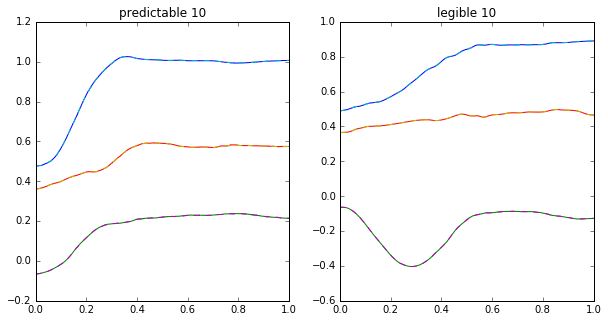

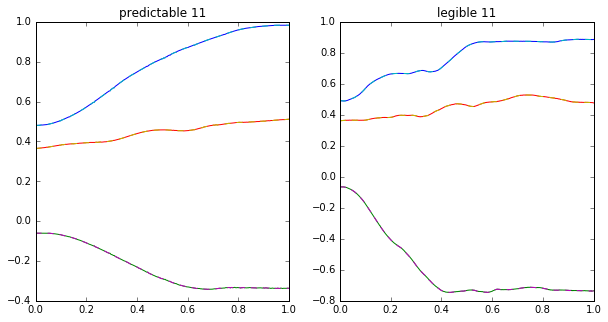

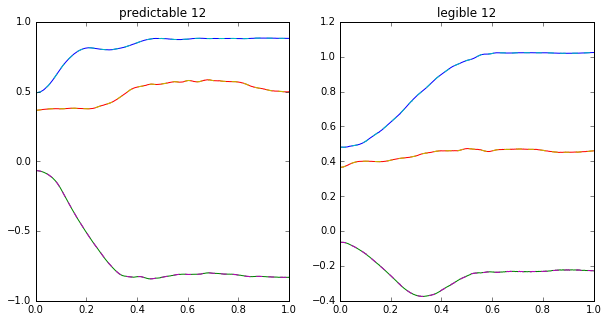

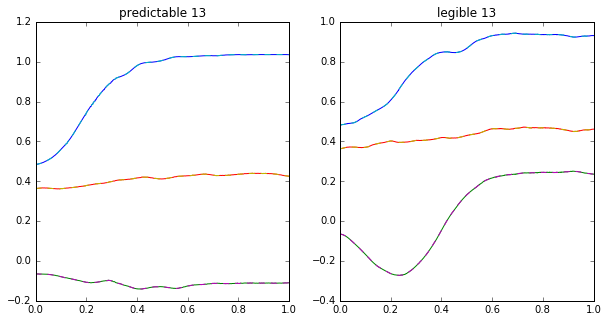

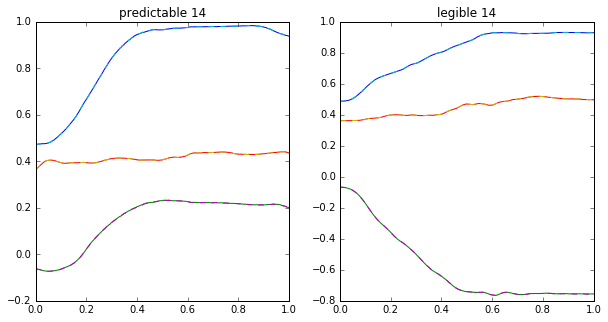

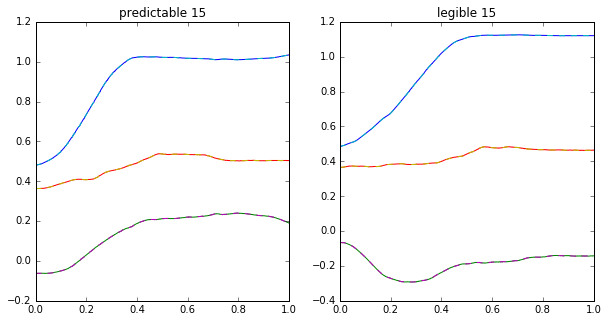

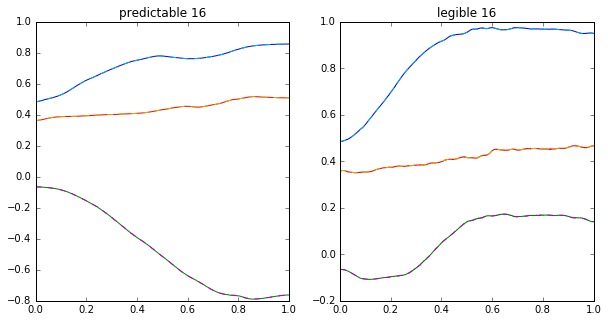

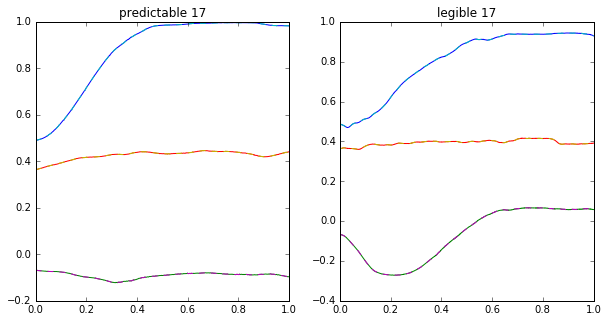

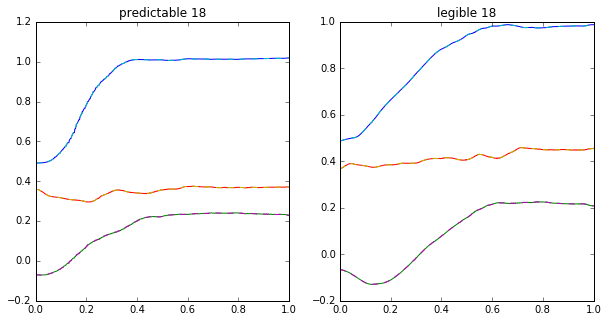

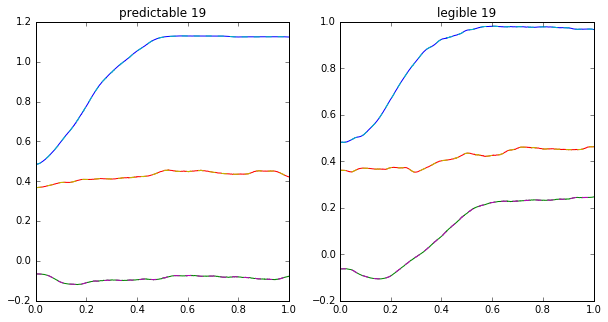

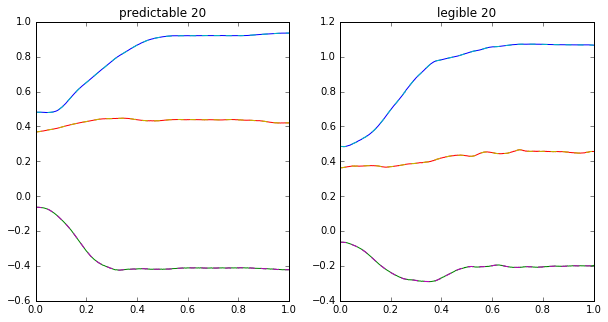

In [3]:
predict_clean_trajs = {}
legible_clean_trajs = {}
X_new = np.linspace(0, 1, 1 / 0.001)
for i in range(N):
    predict_traj = predict_full_trajs[i]['traj']
    legible_traj = legible_full_trajs[i]['traj']
    
    # time starts at 0
    predict_traj[:, 0] -= predict_traj[0, 0]
    legible_traj[:, 0] -= legible_traj[0, 0]
    
    # reformulate time in order for all the trajectories to have the
    # exact same number of samples
    predict_X = np.linspace(0, 1, predict_traj.shape[0])
    legible_X = np.linspace(0, 1, legible_traj.shape[0])
    
    # interpolate
    predict_interp_fn = sinterpolate.interp1d(predict_X, predict_traj[:, 1:], axis=0)
    predict_clean_traj = predict_interp_fn(X_new)
    predict_clean_traj = np.hstack((X_new[:, np.newaxis], predict_clean_traj))
    
    legible_interp_fn = sinterpolate.interp1d(legible_X, legible_traj[:, 1:], axis=0)
    legible_clean_traj = legible_interp_fn(X_new)
    legible_clean_traj = np.hstack((X_new[:, np.newaxis], legible_clean_traj))
    
    predict_clean_trajs[i + 1] = predict_clean_traj
    legible_clean_trajs[i + 1] = legible_clean_traj
    
    # plot for visualization purposes
    predict_rep = predict_traj[:, 8:11]
    predict_crep = predict_clean_traj[:, 8:11]
    
    legible_rep = legible_traj[:, 8:11]
    legible_crep = legible_clean_traj[:, 8:11]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axs[0].set_title('predictable %d' % (i + 1))
    axs[0].plot(predict_X, predict_rep)
    axs[0].plot(X_new, predict_crep, '--')
    axs[1].set_title('legible %d' % (i + 1))
    axs[1].plot(legible_X, legible_rep)
    axs[1].plot(X_new, legible_crep, '--')
    

In [4]:
predict_clean_trajs[20].shape

(1000, 15)

In [5]:
legible_clean_trajs[20].shape

(1000, 15)

# Save trajectories

In [6]:
for i in range(N):
    # retrieve data
    predict_target = predict_full_trajs[i]['target']
    predict_traj = predict_clean_trajs[i + 1]
    legible_target = legible_full_trajs[i]['target']
    legible_traj = legible_clean_trajs[i + 1]

    # save again
    sio.savemat('clean_trajectories/predict_traj%d.mat' % (i + 1), {'target': predict_target, 'traj': predict_traj})
    sio.savemat('clean_trajectories/legible_traj%d.mat' % (i + 1), {'target': legible_target, 'traj': legible_traj})

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [7]:
pwd

'/home/miguel/catkin_ws/src/robot_serving/trajectory_recording'

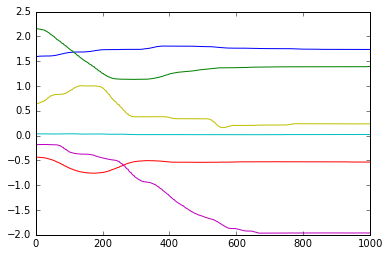

In [8]:
plt.plot(sio.loadmat('clean_trajectories/predict_traj5.mat')['traj'][:, 1:7])

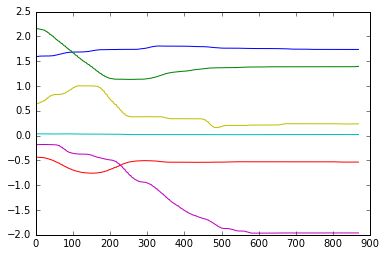

In [9]:
plt.plot(sio.loadmat('raw_trajectories/raw_predict_traj5.mat')['traj'][:, 1:7])

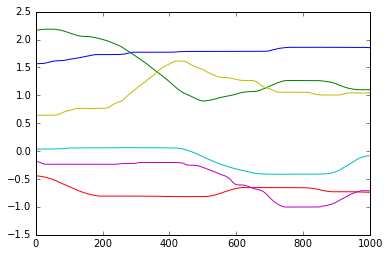

In [10]:
plt.plot(sio.loadmat('clean_trajectories/legible_traj5.mat')['traj'][:, 1:7])

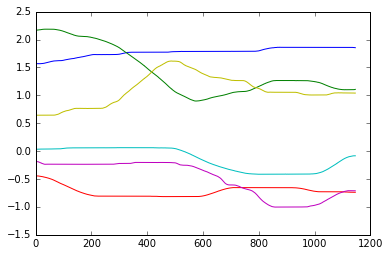

In [11]:
plt.plot(sio.loadmat('raw_trajectories/raw_legible_traj5.mat')['traj'][:, 1:7])